## Needed Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from datetime import datetime
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from sklearn.metrics import mean_absolute_error
pd.options.mode.chained_assignment = None  # default='warn'

### Importing CSV Files and preprocessing ETH Data

In [6]:
# Ethereum Data
df_btc = pd.read_csv("lunarcrush_btc.csv") 
df_btc_features = df_btc[["time","close","reddit_posts","reddit_comments","tweets","tweet_sentiment1","tweet_sentiment2","tweet_sentiment3","tweet_sentiment4","tweet_sentiment5","social_score","social_contributors","news"]]
df_btc_features['date'] = [dt.datetime.fromtimestamp(i).strftime('%d-%m-%Y') for i in df_btc_features['time']]
df_btc_features.index = df_btc_features['date']

df_btc_twitter = df_btc_features[["date","close","tweets","tweet_sentiment1","tweet_sentiment2","tweet_sentiment3","tweet_sentiment4","tweet_sentiment5"]]
df_btc_other = df_btc_features[["date","close","reddit_posts","reddit_comments","social_score","social_contributors","news"]]

df_btc_other['reddit_posts'] = df_btc_other['reddit_posts'].astype("float")
df_btc_other['reddit_comments'] = df_btc_other['reddit_comments'].astype("float")
df_btc_other['social_contributors'] = df_btc_other['social_contributors'].astype("float")

#df_btc_other
#df_btc_twitter

In [7]:
# Check null values
df_btc_other.isnull().sum()
# Some null values need to be deleted

date                    0
close                   0
reddit_posts            0
reddit_comments         0
social_score           27
social_contributors     0
news                   21
dtype: int64

In [8]:
# Check null values
df_btc_twitter.isnull().sum()
# Some null values need to be deleted

date                 0
close                0
tweets              27
tweet_sentiment1    27
tweet_sentiment2    27
tweet_sentiment3    27
tweet_sentiment4    27
tweet_sentiment5    27
dtype: int64

In [9]:
df_btc_other.dropna(subset=['social_score', 'news'], inplace=True)
df_btc_twitter.dropna(subset=['tweets','tweet_sentiment1', 'tweet_sentiment2', 'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5'], inplace=True)

In [10]:
df_btc_other

,date,close,reddit_posts,reddit_comments,social_score,social_contributors,news
date,,,,,,,
24-05-2019,24-05-2019,8011.373440,249.0,4851.0,2.487400e+04,7791.0,258.0
25-05-2019,25-05-2019,8085.922124,223.0,4358.0,2.056100e+04,7698.0,156.0
26-05-2019,26-05-2019,8747.547032,295.0,5862.0,6.853941e+07,5821.0,137.0
27-05-2019,27-05-2019,8798.993299,283.0,5797.0,1.683016e+08,8299.0,245.0
28-05-2019,28-05-2019,8733.696813,157.0,4684.0,3.403083e+08,8063.0,285.0
...,...,...,...,...,...,...,...
08-05-2021,08-05-2021,59040.586768,2071.0,3362.0,9.668311e+08,187320.0,245.0
09-05-2021,09-05-2021,58315.408803,2407.0,3115.0,9.162177e+08,153774.0,221.0
10-05-2021,10-05-2021,56155.680419,2051.0,3461.0,1.072439e+09,158850.0,496.0


In [11]:
df_btc_twitter

,date,close,tweets,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5
date,,,,,,,,
24-05-2019,24-05-2019,8011.373440,51054.0,2041.0,3984.0,11025.0,24636.0,2360.0
25-05-2019,25-05-2019,8085.922124,41588.0,1567.0,2899.0,10068.0,19812.0,1730.0
26-05-2019,26-05-2019,8747.547032,44060.0,1620.0,3267.0,8717.0,22192.0,1886.0
27-05-2019,27-05-2019,8798.993299,56016.0,2551.0,3837.0,10549.0,28007.0,2558.0
28-05-2019,28-05-2019,8733.696813,52484.0,2209.0,3875.0,9333.0,26561.0,3268.0
...,...,...,...,...,...,...,...,...
08-05-2021,08-05-2021,59040.586768,221721.0,6483.0,22917.0,24195.0,158271.0,9855.0
09-05-2021,09-05-2021,58315.408803,213873.0,5363.0,26125.0,21033.0,153030.0,8322.0
10-05-2021,10-05-2021,56155.680419,242043.0,6892.0,27459.0,26303.0,170499.0,10890.0


## Correlation Graphs

<AxesSubplot:>

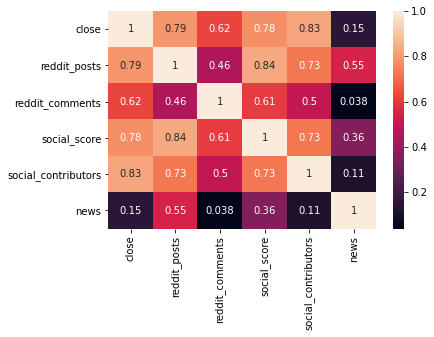

In [12]:
sns.heatmap(df_btc_other.corr(),annot = True)

<AxesSubplot:>

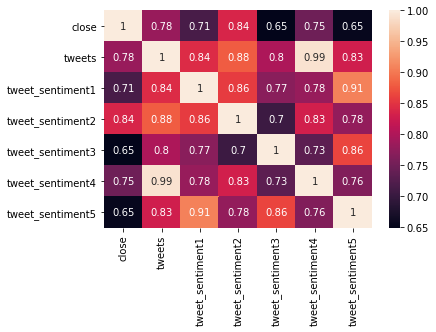

In [13]:
sns.heatmap(df_btc_twitter.corr(),annot = True)

In [ ]:
# Best correlation features to the closing price of bitcoin are
# tweets, tweet_sentiment1, tweet_sentiment2, tweet_sentiment4, 
# reddit_posts, reddit_comments, social_score, social_contributors

In [14]:
# Getting all of these correlations in a single dataframe 
main_df = pd.DataFrame()
main_df = df_btc_twitter[["date","close","tweets","tweet_sentiment1","tweet_sentiment2","tweet_sentiment4"]]
main_df.drop('date',axis='columns', inplace=True)

main_df['reddit_posts'] = df_btc_other['reddit_posts']
main_df['reddit_comments'] = df_btc_other['reddit_comments']
main_df['social_score'] = df_btc_other['social_score']
main_df['social_contributors'] = df_btc_other['social_contributors']

main_df_scaled_tmp = main_df.copy()

main_df

,close,tweets,tweet_sentiment1,tweet_sentiment2,tweet_sentiment4,reddit_posts,reddit_comments,social_score,social_contributors
date,,,,,,,,,
24-05-2019,8011.373440,51054.0,2041.0,3984.0,24636.0,249.0,4851.0,2.487400e+04,7791.0
25-05-2019,8085.922124,41588.0,1567.0,2899.0,19812.0,223.0,4358.0,2.056100e+04,7698.0
26-05-2019,8747.547032,44060.0,1620.0,3267.0,22192.0,295.0,5862.0,6.853941e+07,5821.0
27-05-2019,8798.993299,56016.0,2551.0,3837.0,28007.0,283.0,5797.0,1.683016e+08,8299.0
28-05-2019,8733.696813,52484.0,2209.0,3875.0,26561.0,157.0,4684.0,3.403083e+08,8063.0
...,...,...,...,...,...,...,...,...,...
08-05-2021,59040.586768,221721.0,6483.0,22917.0,158271.0,2071.0,3362.0,9.668311e+08,187320.0
09-05-2021,58315.408803,213873.0,5363.0,26125.0,153030.0,2407.0,3115.0,9.162177e+08,153774.0
10-05-2021,56155.680419,242043.0,6892.0,27459.0,170499.0,2051.0,3461.0,1.072439e+09,158850.0


## Graphs to visualize the Ethereum data

In [15]:
# Scaling to fit into a graph
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
main_df_scaled_tmp[["close","tweets","tweet_sentiment1","tweet_sentiment2","tweet_sentiment4","reddit_posts","reddit_comments","social_score","social_contributors"]] = min_max_scaler.fit_transform(main_df_scaled_tmp[["close","tweets","tweet_sentiment1","tweet_sentiment2","tweet_sentiment4","reddit_posts","reddit_comments","social_score","social_contributors"]])
main_df_scaled_tmp

,close,tweets,tweet_sentiment1,tweet_sentiment2,tweet_sentiment4,reddit_posts,reddit_comments,social_score,social_contributors
date,,,,,,,,,
24-05-2019,0.052593,0.028780,0.045368,0.062010,0.010938,0.054710,0.438652,0.000001,0.007840
25-05-2019,0.053866,0.020049,0.034826,0.041689,0.006141,0.047377,0.389792,0.000000,0.007689
26-05-2019,0.065158,0.022329,0.036005,0.048581,0.008507,0.067682,0.538850,0.015953,0.004655
27-05-2019,0.066036,0.033356,0.056710,0.059256,0.014289,0.064298,0.532408,0.039181,0.008661
28-05-2019,0.064922,0.030099,0.049104,0.059968,0.012852,0.028765,0.422101,0.079230,0.008279
...,...,...,...,...,...,...,...,...,...
08-05-2021,0.923532,0.186189,0.144153,0.416593,0.143814,0.568528,0.291080,0.225104,0.298092
09-05-2021,0.911155,0.178950,0.119246,0.476674,0.138603,0.663283,0.266601,0.213320,0.243856
10-05-2021,0.874294,0.204932,0.153249,0.501657,0.155973,0.562888,0.300892,0.249693,0.252063


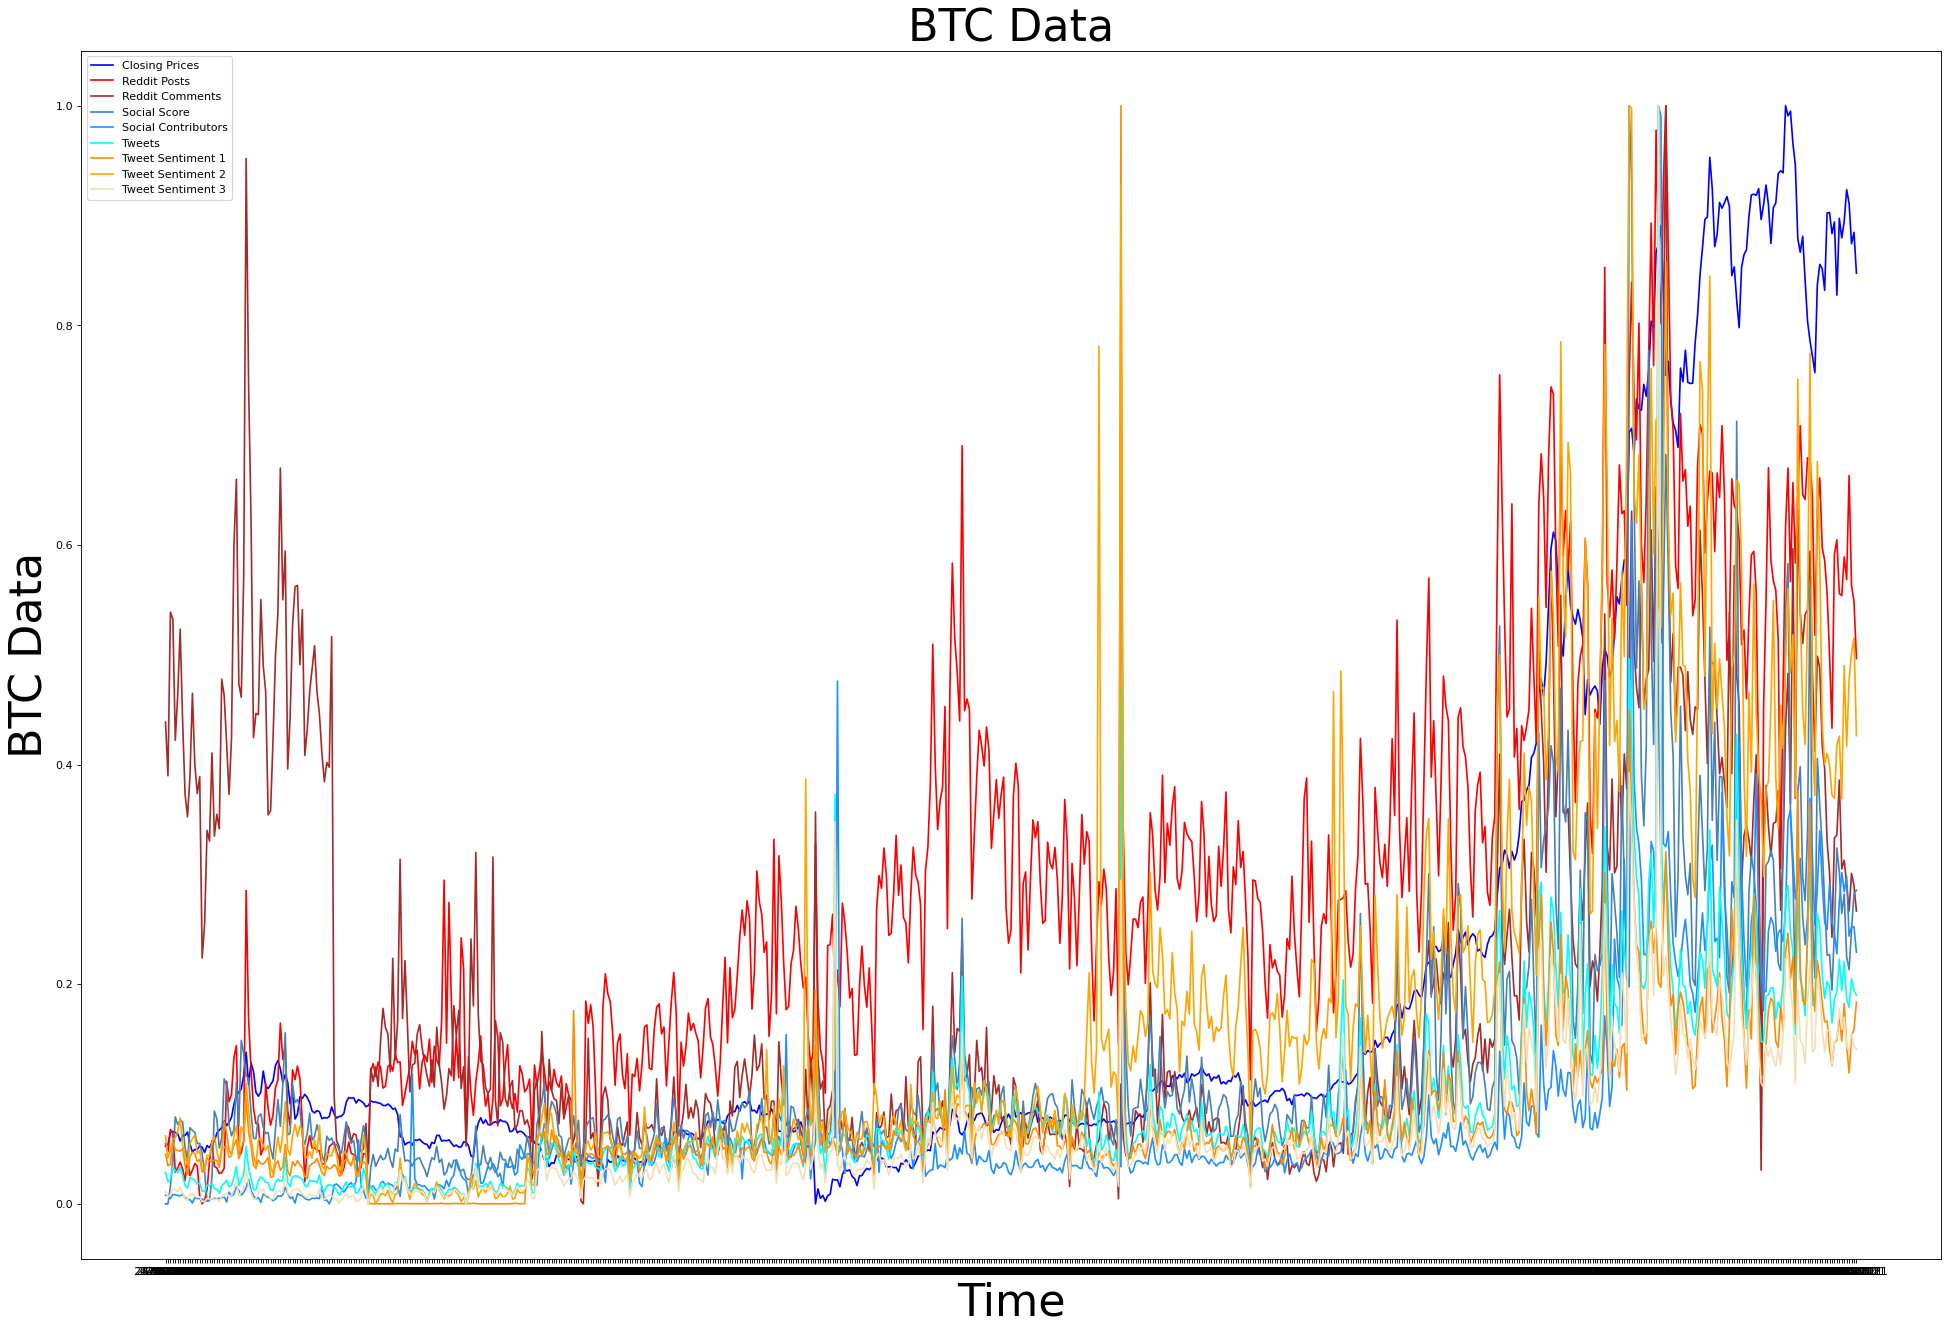

In [16]:
plt.figure(figsize=(30, 20), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(main_df_scaled_tmp.index,main_df_scaled_tmp['close'], color='blue', label='Closing Prices')
plt.plot(main_df_scaled_tmp.index,main_df_scaled_tmp['reddit_posts'], color='red', label='Reddit Posts')
plt.plot(main_df_scaled_tmp.index,main_df_scaled_tmp['reddit_comments'], color='brown', label='Reddit Comments')
plt.plot(main_df_scaled_tmp.index,main_df_scaled_tmp['social_score'], color='steelblue', label='Social Score')
plt.plot(main_df_scaled_tmp.index,main_df_scaled_tmp['social_contributors'], color='dodgerblue', label='Social Contributors')

plt.plot(main_df_scaled_tmp.index,main_df_scaled_tmp['tweets'], color='aqua', label='Tweets')
plt.plot(main_df_scaled_tmp.index,main_df_scaled_tmp['tweet_sentiment1'], color='darkorange', label='Tweet Sentiment 1')
plt.plot(main_df_scaled_tmp.index,main_df_scaled_tmp['tweet_sentiment2'], color='orange', label='Tweet Sentiment 2')
plt.plot(main_df_scaled_tmp.index,main_df_scaled_tmp['tweet_sentiment4'], color='wheat', label='Tweet Sentiment 3')


plt.title('BTC Data', fontsize = 40)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Data', fontsize = 40)
plt.legend()
plt.show()

### Splitting the data for train and test


In [17]:
main_df

,close,tweets,tweet_sentiment1,tweet_sentiment2,tweet_sentiment4,reddit_posts,reddit_comments,social_score,social_contributors
date,,,,,,,,,
24-05-2019,8011.373440,51054.0,2041.0,3984.0,24636.0,249.0,4851.0,2.487400e+04,7791.0
25-05-2019,8085.922124,41588.0,1567.0,2899.0,19812.0,223.0,4358.0,2.056100e+04,7698.0
26-05-2019,8747.547032,44060.0,1620.0,3267.0,22192.0,295.0,5862.0,6.853941e+07,5821.0
27-05-2019,8798.993299,56016.0,2551.0,3837.0,28007.0,283.0,5797.0,1.683016e+08,8299.0
28-05-2019,8733.696813,52484.0,2209.0,3875.0,26561.0,157.0,4684.0,3.403083e+08,8063.0
...,...,...,...,...,...,...,...,...,...
08-05-2021,59040.586768,221721.0,6483.0,22917.0,158271.0,2071.0,3362.0,9.668311e+08,187320.0
09-05-2021,58315.408803,213873.0,5363.0,26125.0,153030.0,2407.0,3115.0,9.162177e+08,153774.0
10-05-2021,56155.680419,242043.0,6892.0,27459.0,170499.0,2051.0,3461.0,1.072439e+09,158850.0


In [18]:
# Converting dates as a datetime object
main_df['date_features'] = main_df.index
main_df['date_features'] = main_df['date_features'].astype("str")

In [19]:
datelist_train = list(main_df['date_features'])
datelist_train = [dt.datetime.strptime(date, '%d-%m-%Y').date() for date in datelist_train]
main_df.index = datelist_train

In [20]:
# Splitting the data to train and test based on the prediction day we want

date_string = "21 February, 2021"
#possible parameter %H:%M:%S

dt_onject_split = dt.datetime.strptime(date_string, "%d %B, %Y").date()
data_train = main_df.loc[main_df.index <= dt_onject_split].copy()
data_test = main_df.loc[main_df.index > dt_onject_split].copy()

print("Data train shape",data_train.shape)
print("Data test shape",data_test.shape)

Data train shape (613, 10)
Data test shape (80, 10)


In [21]:
def create_features_with_twitter(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['Date'] = df.index
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['Day of Month'] = df['Date'].dt.day
    X = df[['Month','Year','Day of Month','tweets', 'tweet_sentiment1', 'tweet_sentiment2', 'tweet_sentiment4']]
    if label:
        y = df[label]
        return X, y
    return X

# 'tweets', 'tweet_sentiment1', 'tweet_sentiment2', 'tweet_sentiment4', 
# 'reddit_posts', 'reddit_comments', 'social_score', 'social_contributors'

def create_features_without_news_reddit(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['Hafta'] = df.index
    df['Hafta'] = pd.to_datetime(df['Hafta'], errors='coerce')
    df['Month'] = df['Hafta'].dt.month
    df['Year'] = df['Hafta'].dt.year
    df['Day of Month'] = df['Hafta'].dt.day
    X = df[['Month','Year','Day of Month','reddit_posts', 'reddit_comments', 'social_score', 'social_contributors']]
    if label:
        y = df[label]
        return X, y
    return X

In [22]:
# Twitter Data
X_train_twitter, y_train_twitter = create_features_with_twitter(data_train, label='close')
X_test_twitter, y_test_twitter = create_features_with_twitter(data_test, label='close')

# News and Reddit data
X_train_news_reddit, y_train_news_reddit = create_features_without_news_reddit(data_train, label='close')
X_test_news_reddit, y_test_news_reddit = create_features_without_news_reddit(data_test, label='close')

X_train_twitter

,Month,Year,Day of Month,tweets,tweet_sentiment1,tweet_sentiment2,tweet_sentiment4
2019-05-24,5,2019,24,51054.0,2041.0,3984.0,24636.0
2019-05-25,5,2019,25,41588.0,1567.0,2899.0,19812.0
2019-05-26,5,2019,26,44060.0,1620.0,3267.0,22192.0
2019-05-27,5,2019,27,56016.0,2551.0,3837.0,28007.0
2019-05-28,5,2019,28,52484.0,2209.0,3875.0,26561.0
...,...,...,...,...,...,...,...
2021-02-17,2,2021,17,365692.0,11582.0,41287.0,264731.0
2021-02-18,2,2021,18,292594.0,10280.0,32276.0,204321.0
2021-02-19,2,2021,19,380183.0,11256.0,38824.0,271497.0
2021-02-20,2,2021,20,1104079.0,9057.0,29926.0,1019343.0


## Create an LSTM model. 

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation

In [25]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler_x = MinMaxScaler()
min_max_scaler_y = MinMaxScaler()

In [26]:
x_training_set = X_train_twitter.values
x_training_set = x_training_set[0:len(x_training_set)]

x_training_set = min_max_scaler_x.fit_transform(x_training_set)
x_training_set = x_training_set.reshape((x_training_set.shape[0], 1, x_training_set.shape[1]))

y_train = pd.DataFrame(y_train_twitter)
list(y_train['close'])
y_train_values = [float(i) for i in y_train['close']]
y_train_values = np.array(y_train_values)
y_train_values = np.array(y_train_values)

y_train_values = np.reshape(y_train_values, (len(y_train_values), 1))
y_training_set = min_max_scaler_y.fit_transform(y_train_values)

In [27]:
# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 50, input_shape=(x_training_set.shape[1], x_training_set.shape[2])))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Using the training set to train the model
regressor.fit(x_training_set, y_training_set, batch_size = 5, epochs = 100)

Epoch 1/100
123/123 [==============================] - 2s 1ms/step - loss: 0.0302
Epoch 2/100
123/123 [==============================] - 0s 944us/step - loss: 0.0113
Epoch 3/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 4/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 5/100
123/123 [==============================] - 0s 984us/step - loss: 0.0079
Epoch 6/100
123/123 [==============================] - 0s 995us/step - loss: 0.0059
Epoch 7/100
123/123 [==============================] - 0s 992us/step - loss: 0.0070
Epoch 8/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 9/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 10/100
123/123 [==============================] - 0s 929us/step - loss: 0.0059
Epoch 11/100
123/123 [==============================] - 0s 893us/step - loss: 0.0059
Epoch 12/100
123/123 [==============================] - 0s 992us/step - loss: 0.0061

In [28]:
test_set = X_test_twitter.values

# Reshaping and scaling the inputs
inputs = np.reshape(test_set, (len(test_set), 7))
inputs = min_max_scaler_x.transform(inputs)
inputs = inputs.reshape((inputs.shape[0], 1, 7))
predicted_price = regressor.predict(inputs)
inputs = inputs.reshape((inputs.shape[0], 1, 7))
predicted_price = min_max_scaler_y.inverse_transform(predicted_price)

In [29]:
predicted_price

array([[42584.086],
       [44088.062],
       [42059.46 ],
       [39824.285],
       [39440.668],
       [36370.227],
       [38103.08 ],
       [39855.906],
       [38740.94 ],
       [38598.05 ],
       [37211.914],
       [37603.426],
       [35798.914],
       [35437.527],
       [38331.13 ],
       [41089.773],
       [41086.086],
       [39244.7  ],
       [42028.168],
       [44818.6  ],
       [39821.285],
       [40352.58 ],
       [40003.953],
       [42945.793],
       [41530.13 ],
       [40207.2  ],
       [37112.484],
       [37499.23 ],
       [41463.01 ],
       [41635.38 ],
       [49004.766],
       [44854.97 ],
       [42421.715],
       [38962.   ],
       [36279.152],
       [40825.586],
       [40355.953],
       [45145.453],
       [42342.508],
       [39085.105],
       [36937.254],
       [36399.332],
       [39191.21 ],
       [39617.7  ],
       [40621.555],
       [40992.164],
       [38954.41 ],
       [39148.33 ],
       [40312.703],
       [40768.91 ],


In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_twitter,predicted_price,squared=False)

15068.003210670424

In [31]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_twitter,predicted_price)

14393.993951852002

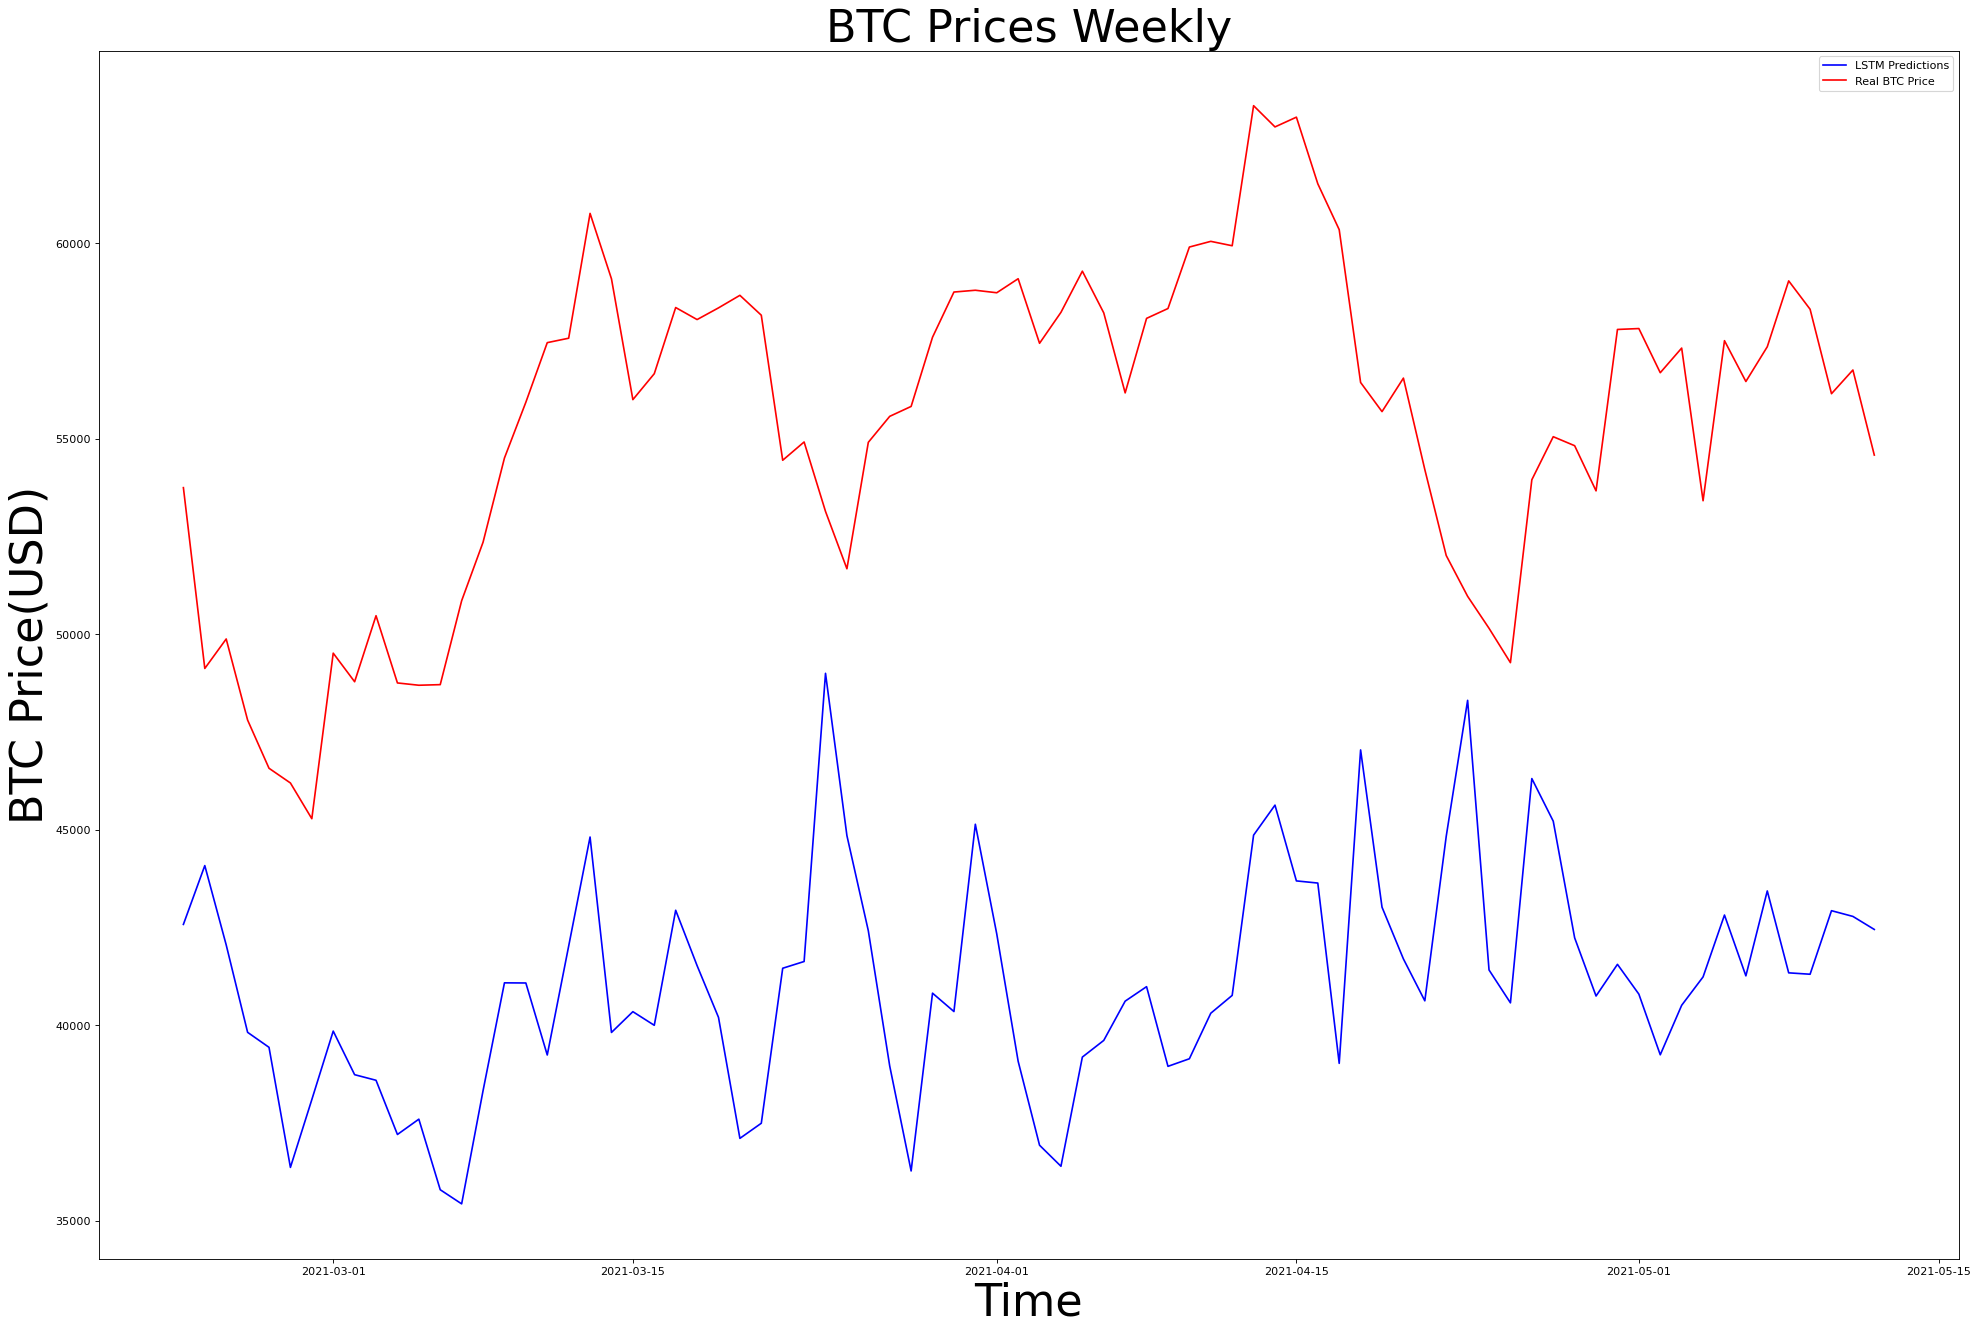

In [33]:
y_test_values = [float(i) for i in y_test_twitter]
plt.figure(figsize=(30, 20), dpi=80, facecolor = 'w', edgecolor = 'k')
plt.plot(X_test_twitter.index,predicted_price, color='blue', label='LSTM Predictions')
plt.plot(X_test_twitter.index,y_test_values, color='red', label='Real BTC Price')
plt.title('BTC Prices Weekly', fontsize = 40)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize = 40)
plt.legend()
plt.show()

# Now we will implement with the other dataset news and reddit data

In [34]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler_x = MinMaxScaler()
min_max_scaler_y = MinMaxScaler()

In [35]:
x_training_set = X_train_news_reddit.values
x_training_set = x_training_set[0:len(x_training_set)]

x_training_set = min_max_scaler_x.fit_transform(x_training_set)
x_training_set = x_training_set.reshape((x_training_set.shape[0], 1, x_training_set.shape[1]))

y_train = pd.DataFrame(y_train_news_reddit)
list(y_train['close'])
y_train_values = [float(i) for i in y_train['close']]
y_train_values = np.array(y_train_values)
y_train_values = np.array(y_train_values)

y_train_values = np.reshape(y_train_values, (len(y_train_values), 1))
y_training_set = min_max_scaler_y.fit_transform(y_train_values)

In [36]:
# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 50, input_shape=(x_training_set.shape[1], x_training_set.shape[2])))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Using the training set to train the model
regressor.fit(x_training_set, y_training_set, batch_size = 5, epochs = 100)

Epoch 1/100
123/123 [==============================] - 2s 951us/step - loss: 0.0330
Epoch 2/100
123/123 [==============================] - 0s 964us/step - loss: 0.0084
Epoch 3/100
123/123 [==============================] - 0s 968us/step - loss: 0.0063
Epoch 4/100
123/123 [==============================] - ETA: 0s - loss: 0.005 - 0s 943us/step - loss: 0.0050
Epoch 5/100
123/123 [==============================] - 0s 967us/step - loss: 0.0040
Epoch 6/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 7/100
123/123 [==============================] - 0s 959us/step - loss: 0.0042
Epoch 8/100
123/123 [==============================] - 0s 933us/step - loss: 0.0033
Epoch 9/100
123/123 [==============================] - 0s 943us/step - loss: 0.0034
Epoch 10/100
123/123 [==============================] - 0s 949us/step - loss: 0.0032
Epoch 11/100
123/123 [==============================] - 0s 961us/step - loss: 0.0026
Epoch 12/100
123/123 [==============================

In [37]:
test_set = X_test_news_reddit.values
# Reshaping and scaling the inputs
inputs = np.reshape(test_set, (len(test_set), 7))
inputs = min_max_scaler_x.transform(inputs)
inputs = inputs.reshape((inputs.shape[0], 1, 7))
predicted_price = regressor.predict(inputs)
inputs = inputs.reshape((inputs.shape[0], 1, 7))
predicted_price = min_max_scaler_y.inverse_transform(predicted_price)

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_news_reddit,predicted_price,squared=False)

14612.769300129175

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_news_reddit,predicted_price)

13106.559881350437

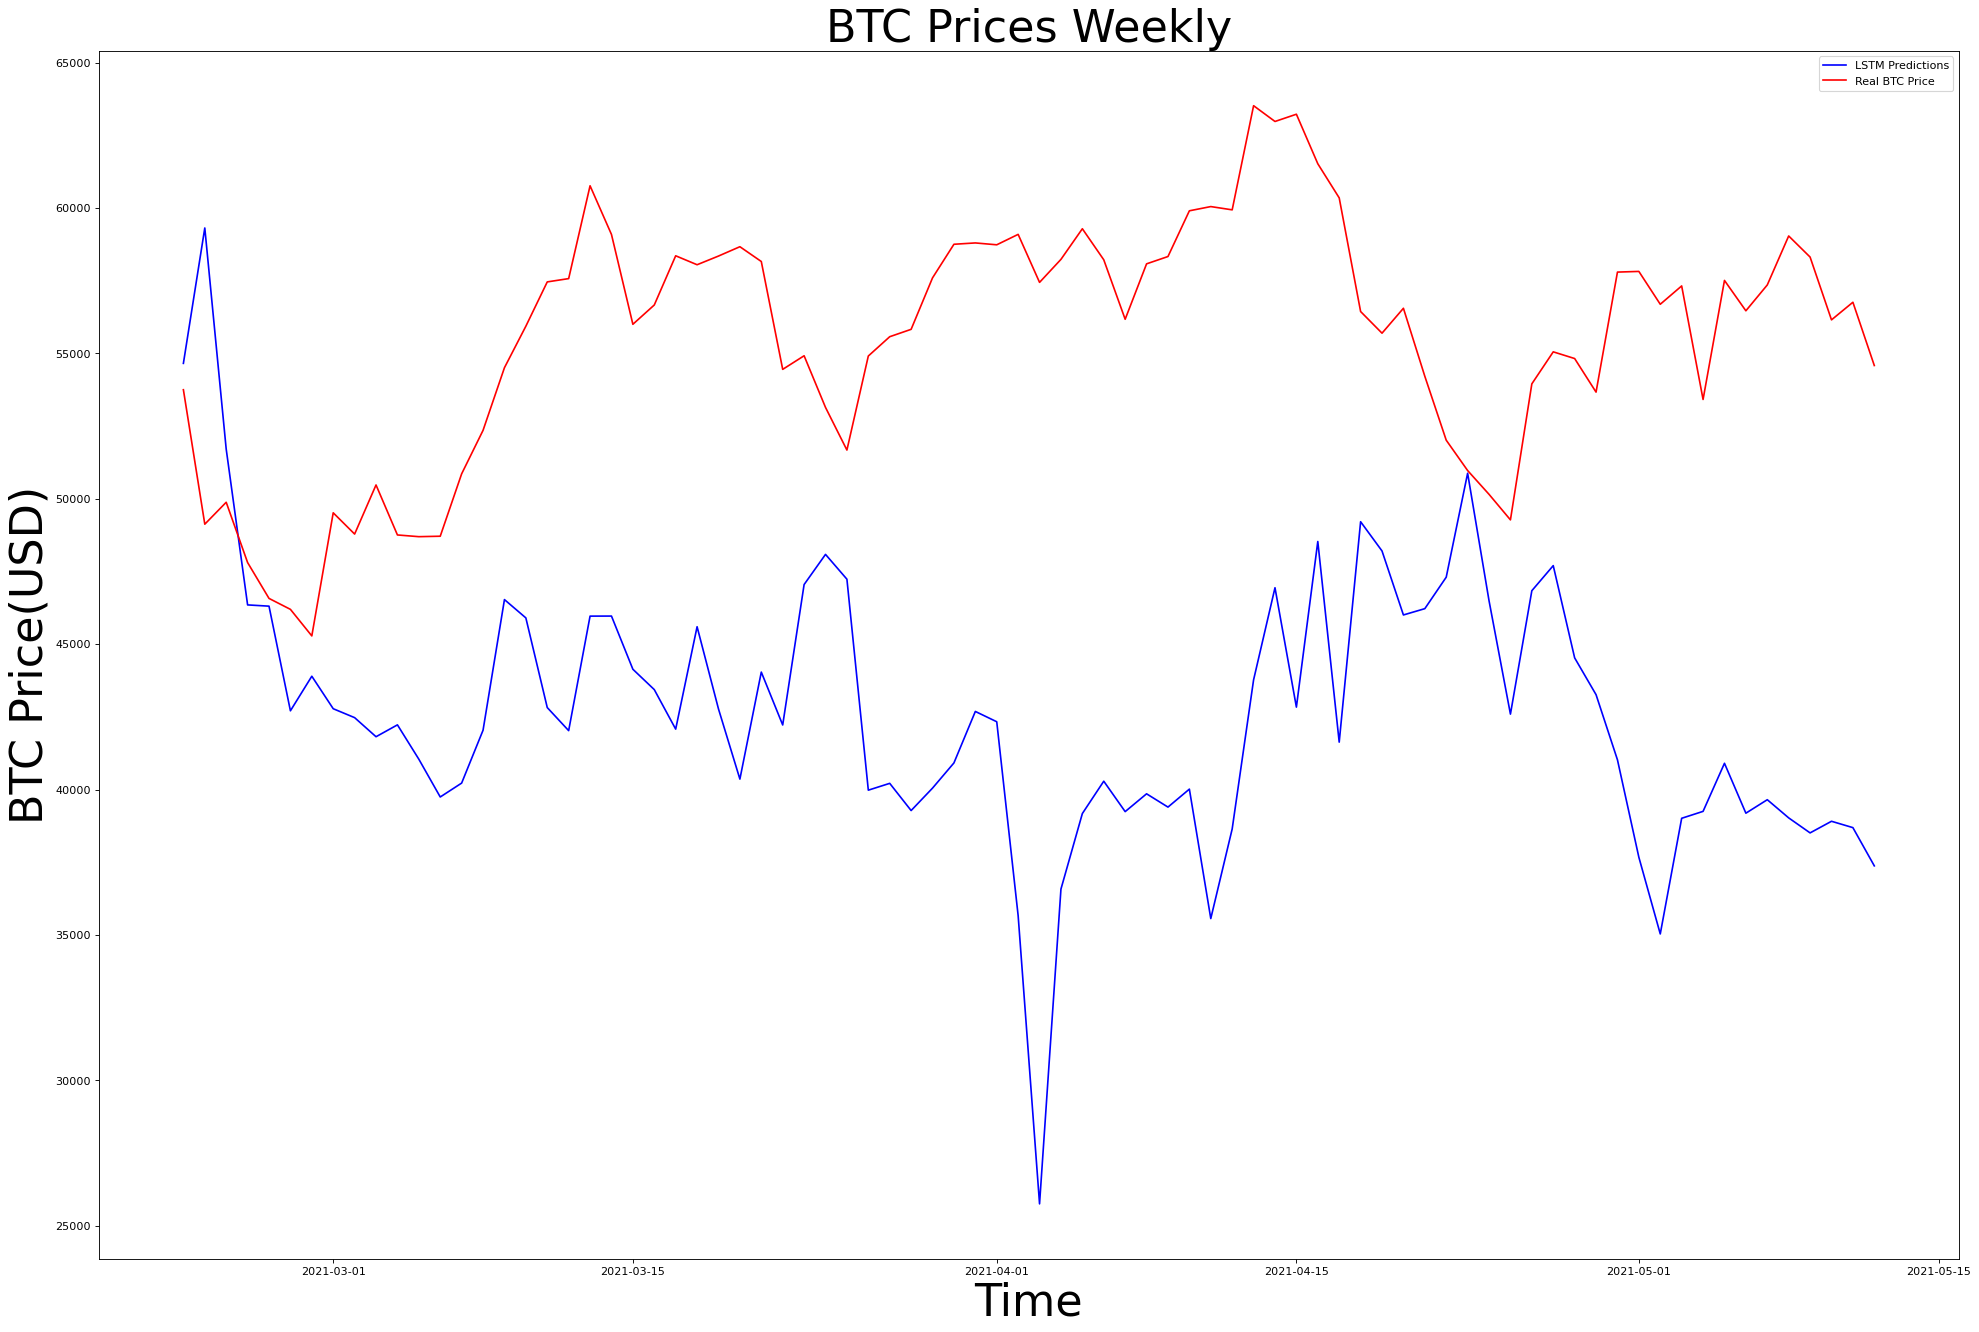

In [41]:
y_test_values = [float(i) for i in y_test_news_reddit]
plt.figure(figsize=(30, 20), dpi=80, facecolor = 'w', edgecolor = 'k')
plt.plot(X_test_news_reddit.index,predicted_price, color='blue', label='LSTM Predictions')
plt.plot(X_test_news_reddit.index,y_test_values, color='red', label='Real BTC Price')
plt.title('BTC Prices Weekly', fontsize = 40)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize = 40)
plt.legend()
plt.show()